#                                      E-Surveillance Alert Classification


# Business Problem

Description:

Prevent break-ins before they occur using IoT security cameras with built-in computer vision capabilities, reducing the need for human intervention. Automated security to safeguard and alert against threats from intrusion or fire using multi-capability sensors such as vibration, motion, smoke, fire, etc.  Ensure the safety of both monetary and intellectual assets with round-the-clock surveillance and controlled access management.



# Problem Statement

We are tasked with classifying the alert whether it is Critical, Normal, or Testing which is received from the various sensors. Such as vibration, motion, smoke, fire, Panic, shutter(Door sensor).

True_Normal= Testing the sensors(Smoke, Panic, fire), Smoke Alert due to AC maintenance / UPS maintenance, Cash loading, Pressing the panic switches unknowingly by bank staffs… 

True_Critical= Smoke, Fire, Network Connection error, PIR, Panic(Fire, Theft Attempt, in ATM and Bank)

False_Normal= Sensor Malfunctioning (keep on getting the alert), No activity from PIR, shutter sensors.

False_Critical = No activity, But, Alert is received from the critical sensor. Such as Smoke, fire, PIR(Motion detection sensor)


# Real world/Business Objectives and Constraints

1.The cost of a mis-classification can be very high.

2.No strict latency concerns.

# Mapping the real world problem to an ML problem

# Type of Machine Leaning Problem

Supervised Learning:

It is a Multi classification problem, for a given sensor data we need to classify if it is critical, Normal, or Testing

# Train and Test Construction

We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with.

# Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')


# Data

In [4]:
data1= pd.read_csv('Master - Ack Time Analysis From April-20 to August-20 - Details.csv')
data=data1.drop(['Branch'],axis=1)
data

,DATE,SOL ID,SENSOR (As of Portal),Region,STATE,SENSOR NAME (Standard),EVENT,EVENT DATE AND TIME,AKNOWLEDGE STATUS,Confirmation,LOG ID,2nd AKNOWLEDGE STATUS,Status,Month,Reason
0,1-Apr-20,6358,System,West,Maharashtra,Network,Network communication error,4/1/20 0:07,True Alarm - Confirmed via Portal & Escalated ...,Confirmed via Portal,46795597,True Alarm - Confirmed via Portal & Escalated ...,True_Critical,Apr,Network communication error
1,1-Apr-20,6116,PIR - Inside Strong Room,South,TN,PIR,PIR Motion Detected Armed Hours,4/1/20 0:11,"\nFalse_False_Alarm - Branch Closed, Verified...",Confirmed via TWAC,46786573,"\nFalse_False_Alarm - Branch Closed, Verified...",False_False,Apr,Verified / Confirmed False alert
2,1-Apr-20,4407,System,South,Andhra Pradesh,Network,Network communication error,4/1/20 0:15,True Alarm - Confirmed via Portal & Escalated ...,Confirmed via Portal,46796697,True Alarm - Confirmed via Portal & Escalated ...,True_Critical,Apr,Network communication error
3,1-Apr-20,6973,System,West,Maharashtra,Network,Network communication error,4/1/20 0:27,True Alarm - Confirmed via Portal & Escalated ...,Confirmed via Portal,46797661,True Alarm - Confirmed via Portal & Escalated ...,True_Critical,Apr,Network communication error
4,1-Apr-20,0066,System,North,Punjab,Network,Network communication error,4/1/20 0:46,True Alarm - Confirmed via Portal & Escalated ...,Confirmed via Portal,46800167,True Alarm - Confirmed via Portal & Escalated ...,True_Critical,Apr,Network communication error
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185682,30-Sep-20,6707,Hooter - Inside,West,Rajasthan,Hooter,Hooter ON,9/30/20 14:10,"True_Normal - Alarm - Confirmed with DBM, Acci...",Confirmed with DBM,66121955,"True_Normal - Alarm - Confirmed with DBM, Acci...",True_Normal,September,Accidentally done by bank staff.
185683,30-Sep-20,6707,Panic - Stop Panic,West,Rajasthan,Stop Panic,Stop Panic Alarm,9/30/20 14:10,"True_Normal - Alarm - Confirmed with DBM, Acci...",Confirmed with DBM,66121971,"True_Normal - Alarm - Confirmed with DBM, Acci...",True_Normal,September,Accidentally done by bank staff.
185684,30-Sep-20,2797,Smoke Sensor - ATM Lobby,East,Orissa,Smoke,Smoke Alarm,9/30/20 14:11,"Testing_Alarm - Confirmed with DBM, Testing b...",Confirmed with DBM,66121991,"Testing_Alarm - Confirmed with DBM, Testing b...",Testing,September,Testing by FSE
185685,30-Sep-20,2797,Hooter,East,Orissa,Hooter,Hooter ON,9/30/20 14:11,"Testing_Alarm - Confirmed with DBM, Testing b...",Confirmed with DBM,66122009,"Testing_Alarm - Confirmed with DBM, Testing b...",Testing,September,Testing by FSE


## Showing first 5 rows of the dataset

In [ ]:
data.head(5)

In [ ]:
#Diiferent types of sensor are used in the bank

In [133]:
sensors_type=data['SENSOR NAME (Standard)'].drop_duplicates()
sensors_type

0                Network
1                    PIR
5              Vibration
9                 Hooter
10         Front Shutter
42           Stop Panic 
43           Arm Dis-Arm
59                Panic 
92                Smoke 
119         Energy Vault
197           Chest Door
7985       UPS Room Door
11871      ATM Back Door
82659         Chest Door
82666           Network 
82667         Vibration 
82713              Smoke
82719      Front Shutter
82737              Panic
113385               NaN
Name: SENSOR NAME (Standard), dtype: object

# Shape

In [4]:
data.shape

(185687, 16)

## Counting the output values for each categories

In [5]:
data.Status.value_counts().count

<bound method Series.count of True_Normal      110395
 Testing          36442
 False_False      23755
True_Critical     10505
FALSE              4590
Name: Status, dtype: int64>

# Features of the data set

In [6]:
data.columns

Index(['DATE', 'SOL ID', 'Branch', 'SENSOR (As of Portal)', 'Region', 'STATE',
       'SENSOR NAME (Standard)', ' EVENT', 'EVENT DATE AND TIME',
       'AKNOWLEDGE STATUS', 'Confirmation', 'LOG ID', '2nd AKNOWLEDGE STATUS',
       'Status', 'Month', 'Reason'],
      dtype='object')

In [77]:
data_features=data.Status.drop_duplicates()
data_features

0         True_Critical
1           False_False
39          True_Normal
1018            Testing
120123            FALSE
Name: Status, dtype: object

## Number of distinct observations 

In [13]:
data.nunique()

DATE                         177
SOL ID                      1721
Branch                      1793
SENSOR (As of Portal)       1327
Region                         4
STATE                         22
SENSOR NAME (Standard)        19
 EVENT                        14
EVENT DATE AND TIME        73423
AKNOWLEDGE STATUS           9864
Confirmation                  36
LOG ID                    185475
2nd AKNOWLEDGE STATUS      10078
Status                         5
Month                          6
Reason                        18
dtype: int64

# Removing the Unnecessary Columns

In [5]:
p=data.drop(['LOG ID','SENSOR (As of Portal)','DATE','SENSOR NAME (Standard)', 'Month','EVENT DATE AND TIME','Reason'], axis=1)
p


,SOL ID,Region,STATE,EVENT,AKNOWLEDGE STATUS,Confirmation,2nd AKNOWLEDGE STATUS,Status
0,6358,West,Maharashtra,Network communication error,True Alarm - Confirmed via Portal & Escalated ...,Confirmed via Portal,True Alarm - Confirmed via Portal & Escalated ...,True_Critical
1,6116,South,TN,PIR Motion Detected Armed Hours,"\nFalse_False_Alarm - Branch Closed, Verified...",Confirmed via TWAC,"\nFalse_False_Alarm - Branch Closed, Verified...",False_False
2,4407,South,Andhra Pradesh,Network communication error,True Alarm - Confirmed via Portal & Escalated ...,Confirmed via Portal,True Alarm - Confirmed via Portal & Escalated ...,True_Critical
3,6973,West,Maharashtra,Network communication error,True Alarm - Confirmed via Portal & Escalated ...,Confirmed via Portal,True Alarm - Confirmed via Portal & Escalated ...,True_Critical
4,0066,North,Punjab,Network communication error,True Alarm - Confirmed via Portal & Escalated ...,Confirmed via Portal,True Alarm - Confirmed via Portal & Escalated ...,True_Critical
...,...,...,...,...,...,...,...,...
185682,6707,West,Rajasthan,Hooter ON,"True_Normal - Alarm - Confirmed with DBM, Acci...",Confirmed with DBM,"True_Normal - Alarm - Confirmed with DBM, Acci...",True_Normal
185683,6707,West,Rajasthan,Stop Panic Alarm,"True_Normal - Alarm - Confirmed with DBM, Acci...",Confirmed with DBM,"True_Normal - Alarm - Confirmed with DBM, Acci...",True_Normal
185684,2797,East,Orissa,Smoke Alarm,"Testing_Alarm - Confirmed with DBM, Testing b...",Confirmed with DBM,"Testing_Alarm - Confirmed with DBM, Testing b...",Testing
185685,2797,East,Orissa,Hooter ON,"Testing_Alarm - Confirmed with DBM, Testing b...",Confirmed with DBM,"Testing_Alarm - Confirmed with DBM, Testing b...",Testing


## Checking for NaN/null values

In [6]:
p.isna().sum()


SOL ID                   0
Region                   0
STATE                    0
 EVENT                   0
AKNOWLEDGE STATUS        0
Confirmation             0
2nd AKNOWLEDGE STATUS    0
Status                   0
dtype: int64

## Handling categorical data

Here we are converting categorical data to numerical data using label encoder

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
xm=p.apply(LabelEncoder().fit_transform)
xm

,SOL ID,Region,STATE,EVENT,AKNOWLEDGE STATUS,Confirmation,2nd AKNOWLEDGE STATUS,Status
0,1255,3,11,6,7872,14,8079,3
1,1166,2,17,8,434,15,442,0
2,1092,2,0,6,7872,14,8079,3
3,1525,3,11,6,7872,14,8079,3
4,11,1,15,6,7872,14,8079,3
...,...,...,...,...,...,...,...,...
185682,1369,3,16,5,8337,19,8587,4
185683,1369,3,16,12,8337,19,8587,4
185684,807,0,13,10,2968,19,3045,1
185685,807,0,13,5,2968,19,3045,1


# Spliting input features

In [8]:
X=xm.iloc[:,:-1]
X

,SOL ID,Region,STATE,EVENT,AKNOWLEDGE STATUS,Confirmation,2nd AKNOWLEDGE STATUS
0,1255,3,11,6,7872,14,8079
1,1166,2,17,8,434,15,442
2,1092,2,0,6,7872,14,8079
3,1525,3,11,6,7872,14,8079
4,11,1,15,6,7872,14,8079
...,...,...,...,...,...,...,...
185682,1369,3,16,5,8337,19,8587
185683,1369,3,16,12,8337,19,8587
185684,807,0,13,10,2968,19,3045
185685,807,0,13,5,2968,19,3045


# Output feature

In [9]:
y=xm.iloc[:,7]
y

0         3
1         0
2         3
3         3
4         3
         ..
185682    4
185683    4
185684    1
185685    1
185686    1
Name: Status, Length: 185687, dtype: int32

In [10]:
#columns to list
feature_names = X.columns.tolist()
feature_names

['SOL ID',
 'Region',
 'STATE',
 ' EVENT',
 'AKNOWLEDGE STATUS',
 'Confirmation',
 '2nd AKNOWLEDGE STATUS']

# Feature Importance

In [11]:
#importing the ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt


In [147]:
model = ExtraTreesRegressor()


In [148]:
model.fit(X,y)

print(model.feature_importances_)


[0.04941096 0.01162244 0.01898071 0.03501246 0.31675196 0.16743766
 0.40078382]


# Which are the best features?

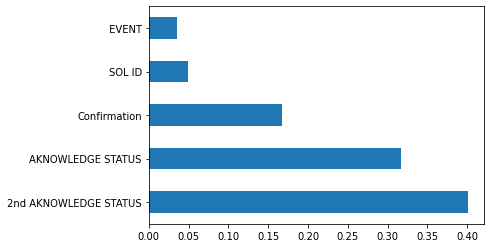

In [149]:
#Top 5 important features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

Calculate the correlation with y for each feature 

In [12]:
xm.corr()

,SOL ID,Region,STATE,EVENT,AKNOWLEDGE STATUS,Confirmation,2nd AKNOWLEDGE STATUS,Status
SOL ID,1.000000,0.265381,0.076566,0.019894,0.009091,-0.011106,0.010405,0.013946
Region,0.265381,1.000000,-0.265645,-0.004633,-0.030057,-0.013371,-0.028609,0.023269
STATE,0.076566,-0.265645,1.000000,-0.018737,0.028354,0.002211,0.028944,0.042123
EVENT,0.019894,-0.004633,-0.018737,1.000000,0.017059,-0.036335,0.019393,0.040683
AKNOWLEDGE STATUS,0.009091,-0.030057,0.028354,0.017059,1.000000,0.008753,0.959627,0.287432
Confirmation,-0.011106,-0.013371,0.002211,-0.036335,0.008753,1.000000,0.019503,0.109857
2nd AKNOWLEDGE STATUS,0.010405,-0.028609,0.028944,0.019393,0.959627,0.019503,1.000000,0.308584
Status,0.013946,0.023269,0.042123,0.040683,0.287432,0.109857,0.308584,1.000000


# Heat Map

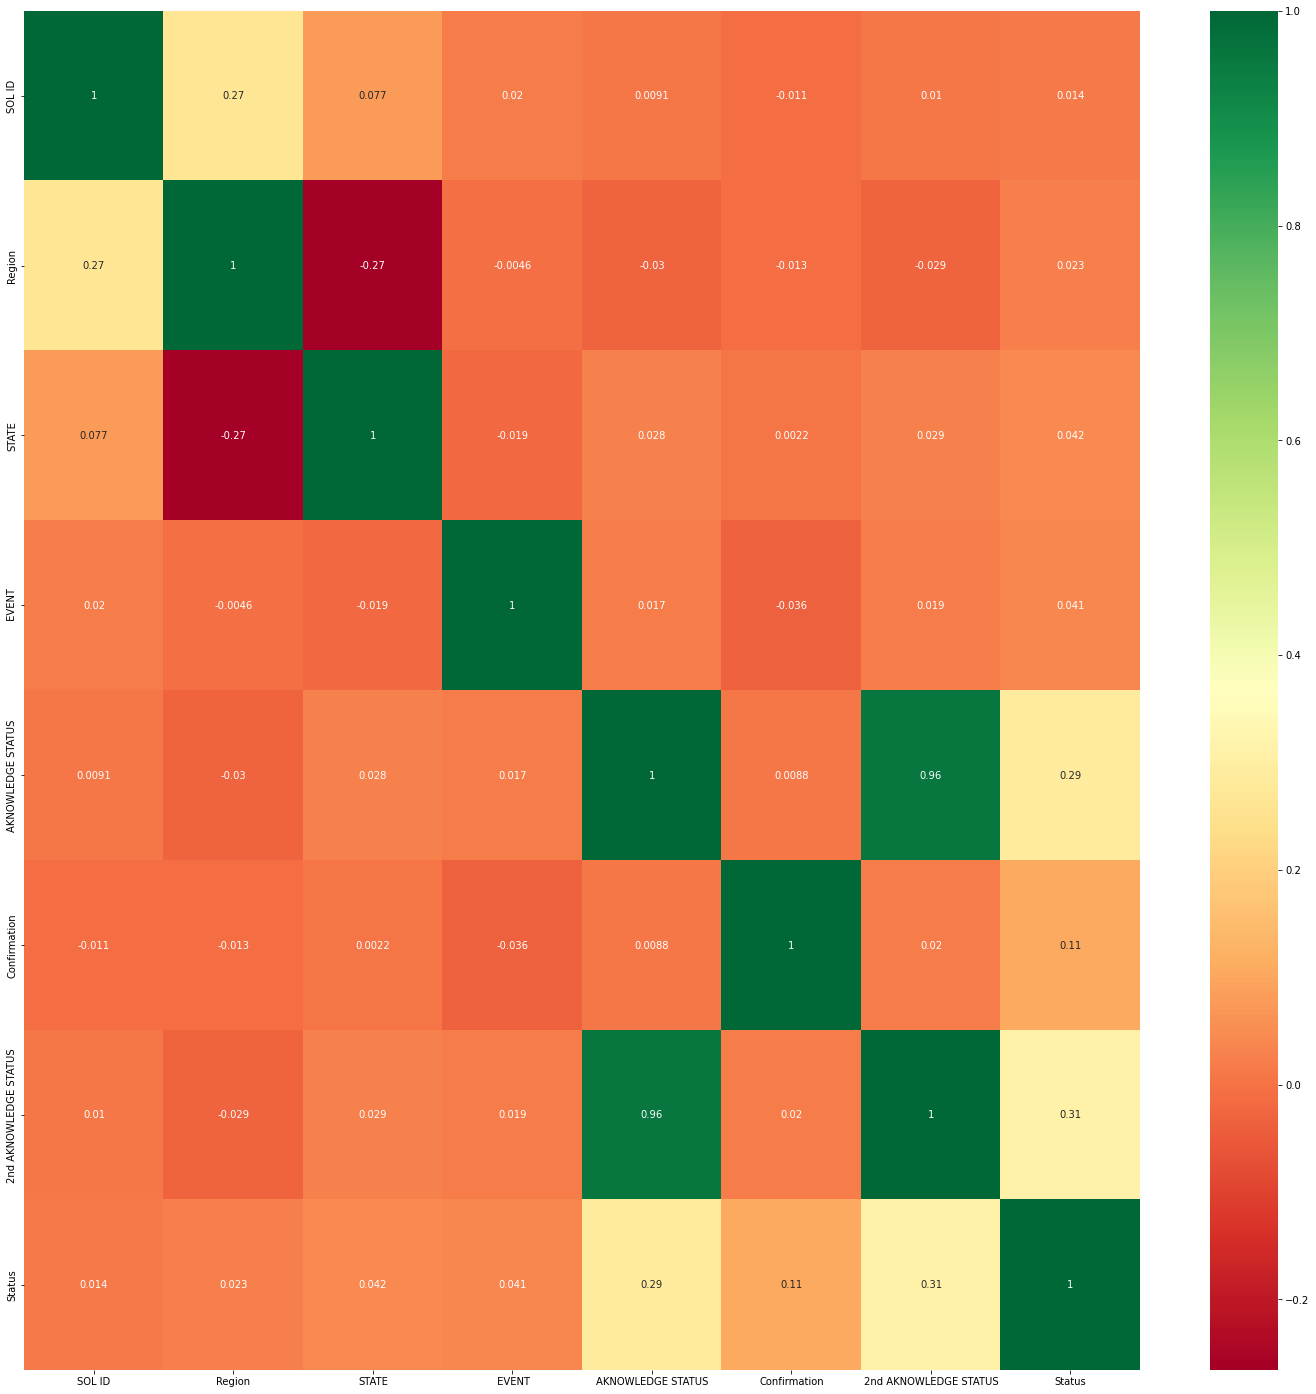

In [13]:
#get correlations of each features in dataset
corrmat = xm.corr()
corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map

c=sns.heatmap(xm[corr_features].corr(),annot=True,cmap="RdYlGn")

df.pivot(index='Business', columns='Date', values='Value')


# Split Train and Test data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=5,stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(129980, 7)
(55707, 7)
(129980,)
(55707,)


## Building machine learing model

# 1. KNearest Neighbour

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
print(knn_classifier.score(X_test, y_test))
print(knn_classifier.score(X_train, y_train))

0.9673649631105606
0.9784582243422065


In [52]:

X_= np.array([1255,3,11,6,7872,14,8079])
y_pred =knn_classifier.predict([X_])


X1 = np.array([807,0,13,10,2968,19,3045])
y_pred1 =knn_classifier.predict([X1])

print(y_pred)
print(y_pred1)


[3]
[1]


# Evaluate the model

## Classification Report

In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_predictions , target_names =data_features ))

               precision    recall  f1-score   support

True_Critical       0.91      0.92      0.92      7127
  False_False       0.98      0.97      0.97     10933
  True_Normal       0.66      0.62      0.64      1377
      Testing       0.98      0.99      0.98      3151
        FALSE       0.99      0.99      0.99     33119

     accuracy                           0.97     55707
    macro avg       0.90      0.90      0.90     55707
 weighted avg       0.97      0.97      0.97     55707



In [154]:
confusion_matrix(y_test,knn_predictions)


array([[ 6574,    18,   404,     0,   131],
       [   24, 10634,     2,    27,   246],
       [  491,     3,   849,     0,    34],
       [    0,    10,     0,  3104,    37],
       [  114,   220,    28,    29, 32728]], dtype=int64)

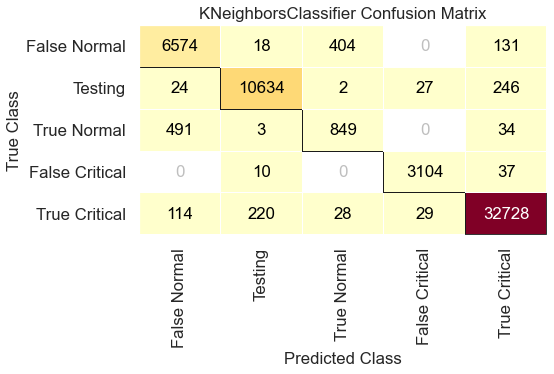

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [59]:
#Source:https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
# Get and reshape confusion matrix data
from yellowbrick.classifier import ConfusionMatrix
model =knn_classifier

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=['False Normal','Testing','True Normal','False Critical','True Critical'])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train,y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

# 2. Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
RSEED=50
print(rf_classifier.score(X_test, y_test))
print(rf_classifier.score(X_train, y_train))

0.9806128493726103
0.9976688721341744


In [182]:

X_= np.array([807,0,13,10,2968,19,3045])
y_pred =rf_classifier.predict([X_])
y_pred

array([1])

In [108]:
y_pred =rf_classifier.predict(X_test)
y_pred

array([4, 4, 4, ..., 4, 4, 1])

## Classification Report

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names =data_features ))

               precision    recall  f1-score   support

True_Critical       0.94      0.96      0.95      7127
  False_False       0.99      0.99      0.99     10933
  True_Normal       0.80      0.71      0.75      1377
      Testing       1.00      1.00      1.00      3151
        FALSE       0.99      0.99      0.99     33119

     accuracy                           0.98     55707
    macro avg       0.94      0.93      0.94     55707
 weighted avg       0.98      0.98      0.98     55707



## Confusion Matrix

In [110]:
confusion_matrix(y_test, y_pred)


array([[ 6810,     1,   242,     0,    74],
       [    3, 10796,     0,     0,   134],
       [  385,     2,   977,     0,    13],
       [    0,     1,     0,  3144,     6],
       [   46,   146,     1,     0, 32926]], dtype=int64)

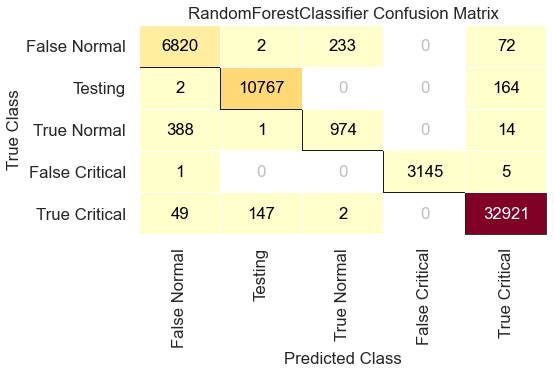

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [64]:
#Source:https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
# Get and reshape confusion matrix data
from yellowbrick.classifier import ConfusionMatrix
model =rf_classifier 

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=['False Normal','Testing','True Normal','False Critical','True Critical'])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train,y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

## Random Forest with RandomizedSearchCV

In [17]:
RSEED=50
rf = RandomForestClassifier(random_state= RSEED)
from pprint import pprint
# Look at parameters used by our current forest

#print('Parameters currently in use:\n')
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 50,
 'verbose': 0,
 'warm_start': False}


# Set the parameter grid

In [18]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']+list(np.arange(0.5, 1, 0.1))
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 20, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [3, 4, 6, 8, 9, 11, 13, 14, 16, 18, 20, None],
 'max_features': ['auto',
                  'sqrt',
                  0.5,
                  0.6,
                  0.7,
                  0.7999999999999999,
                  0.8999999999999999],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


## Create the Random Search model

In [19]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=RSEED,n_jobs = -1)


## Fit the model

In [20]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=50),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 6, 8, 9, 11, 13, 14,
                                                      16, 18, 20, None],
                                        'max_features': ['auto', 'sqrt', 0.5,
                                                         0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
          

## Explore the best parameters

In [21]:
print(rf_random.best_params_)

{'n_estimators': 94, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.8999999999999999, 'max_depth': 18, 'bootstrap': True}


# Use the Best Model

In [22]:
random_cv=rf_random.best_estimator_
random_cv

RandomForestClassifier(max_depth=18, max_features=0.8999999999999999,
                       n_estimators=94, random_state=50)

In [23]:
y_pred1 = random_cv.predict(X_test)
y_pred1

array([4, 4, 4, ..., 4, 4, 1])

In [53]:
print(random_cv.score(X_test,y_test))
print(random_cv.score(X_train,y_train))

0.9720681422442422
0.9724342206493307


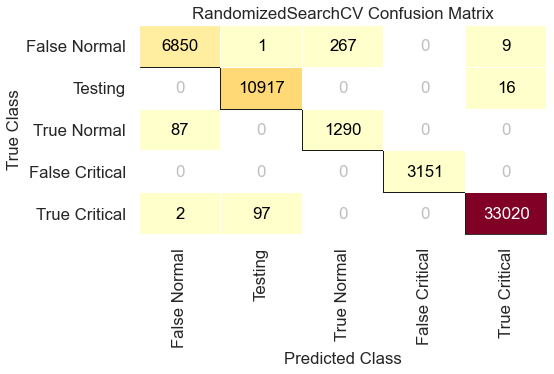

<AxesSubplot:title={'center':'RandomizedSearchCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [65]:
from yellowbrick.classifier import ConfusionMatrix
model =rf_random

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=['False Normal','Testing','True Normal','False Critical','True Critical'])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train,y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

# Building model with Balanced Dataset

In [54]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

# RandomForest with Oversampling(RandomizedSearchCV)

In [26]:
oversample = RandomOverSampler(sampling_strategy='minority')


In [27]:
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X,y)

# summarize class distribution
print("After oversampling: ",Counter(y_train_over))

After oversampling:  Counter({4: 110395, 2: 110395, 1: 36442, 0: 23755, 3: 10505})


In [28]:
rf_random.fit(X_train_over, y_train_over)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=50),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 6, 8, 9, 11, 13, 14,
                                                      16, 18, 20, None],
                                        'max_features': ['auto', 'sqrt', 0.5,
                                                         0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
          

In [67]:
random_cv_new1=rf_random.best_estimator_
random_cv_new1

RandomForestClassifier(max_depth=18, max_features=0.8999999999999999,
                       n_estimators=94, random_state=50)

In [68]:
print(random_cv_new1.score(X_test,y_test))
print(random_cv_new1.score(X_train_over,y_train_over))

0.9914014396754447
0.9696115159249653


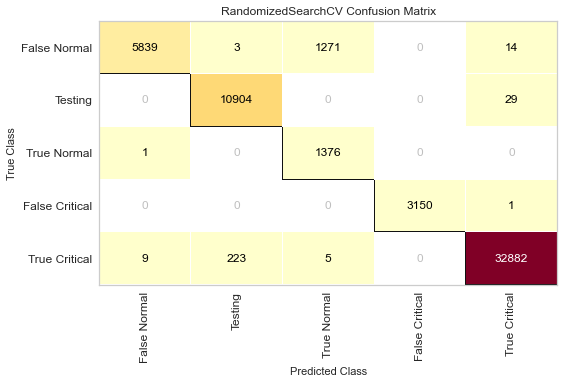

<AxesSubplot:title={'center':'RandomizedSearchCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [37]:
from yellowbrick.classifier import ConfusionMatrix
model = rf_random

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=['False Normal','Testing','True Normal','False Critical','True Critical'])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_over, y_train_over)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

# RandomForest with Undersampling(RandomizedSearchCV)

In [38]:
Undersample = RandomUnderSampler(sampling_strategy='majority')

In [39]:
# fit and apply the transform
X_train_under, y_train_under = Undersample.fit_resample(X,y)

# summarize class distribution
print("After oversampling: ",Counter(y_train_under))

After oversampling:  Counter({1: 36442, 0: 23755, 3: 10505, 2: 4590, 4: 4590})


In [40]:
rf_random.fit(X_train_under, y_train_under)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=50),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 6, 8, 9, 11, 13, 14,
                                                      16, 18, 20, None],
                                        'max_features': ['auto', 'sqrt', 0.5,
                                                         0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
          

In [41]:
random_cv_new=rf_random.best_estimator_
random_cv_new

RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=73, random_state=50)

In [42]:
print(random_cv_new.score(X_test,y_test))
print(random_cv_new.score(X_train_under,y_train_under))

0.8709497908700882
0.9321123657394658


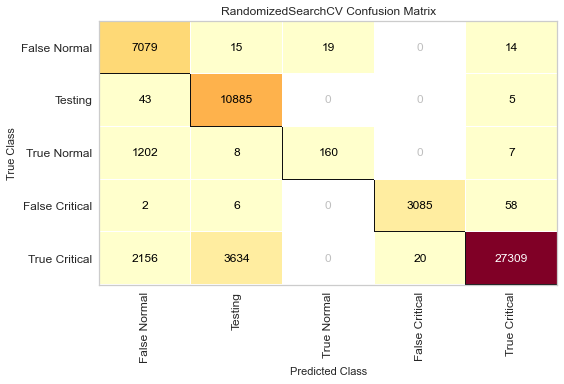

<AxesSubplot:title={'center':'RandomizedSearchCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [43]:
from yellowbrick.classifier import ConfusionMatrix
model = rf_random

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=['False Normal','Testing','True Normal','False Critical','True Critical'])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_under, y_train_under)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

# RandomForest with Combinedsampling(RandomizedSearchCV)

In [56]:
X_combined_sampling, y_combined_sampling = Undersample.fit_resample(X_train_over, y_train_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Combined Random Sampling: Counter({4: 110395, 1: 36442, 0: 23755, 2: 10505, 3: 10505})


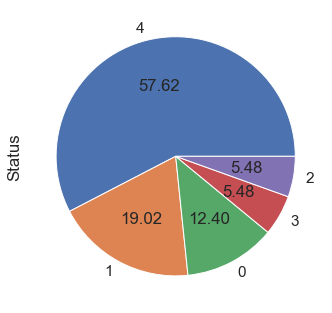

In [57]:
ax=  y_combined_sampling.value_counts().plot.pie(autopct='%.2f')

In [58]:
rf_random.fit(X_combined_sampling, y_combined_sampling)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=50),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 6, 8, 9, 11, 13, 14,
                                                      16, 18, 20, None],
                                        'max_features': ['auto', 'sqrt', 0.5,
                                                         0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
          

In [60]:
random_cv_combined=rf_random.best_estimator_
random_cv_combined

RandomForestClassifier(max_depth=18, max_features=0.8999999999999999,
                       n_estimators=94, random_state=50)

In [66]:
print(random_cv_combined.score(X_test,y_test))
print(random_cv_combined.score(X_combined_sampling, y_combined_sampling))

0.9914014396754447
0.9904280748635191


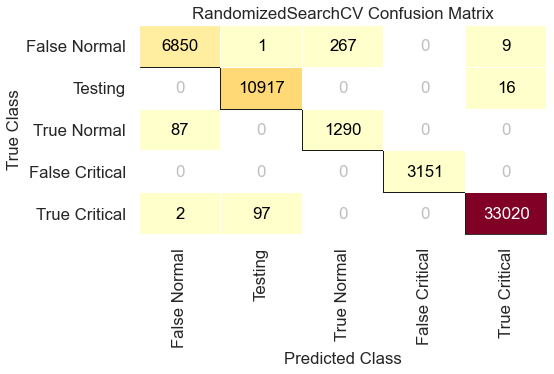

<AxesSubplot:title={'center':'RandomizedSearchCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [62]:
from yellowbrick.classifier import ConfusionMatrix
model = rf_random

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=['False Normal','Testing','True Normal','False Critical','True Critical'])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_combined_sampling, y_combined_sampling)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

# Conclusion

In [69]:
print('\n                                      Accuracy     Error')
print('                                     ----------   --------')

print('KNN                                   : {:.04}%       {:.04}% '.format(knn_classifier.score(X_test, y_test) * 100,\
                                                        100-(knn_classifier.score(X_test, y_test) * 100)))

print('Random Forest                         : {:.04}%       {:.04}% '.format(rf_classifier.score(X_test, y_test)* 100,\
                                                           100-(rf_classifier.score(X_test, y_test)* 100)))

print('Random Forest with RandomizedSearchCV : {:.04}%       {:.04}% '.format(random_cv.score(X_test, y_test)* 100,\
                                                           100-(random_cv.score(X_test, y_test)* 100)))
print('Random Forest(oversampling) with RandomizedSearchCV : {:.04}%       {:.04}% '.format(random_cv_new1.score(X_test, y_test)* 100,\
                                                           100-(random_cv_new1.score(X_test, y_test)* 100)))
print('Random Forest(Undersampling) with RandomizedSearchCV : {:.04}%       {:.04}% '.format(random_cv_new.score(X_test, y_test)* 100,\
                                                           100-(random_cv_new.score(X_test, y_test)* 100)))
print('Random Forest(Combined Sampling) with RandomizedSearchCV : {:.04}%       {:.04}% '.format(random_cv_combined.score(X_test, y_test)* 100,\
                                                           100-(random_cv_combined.score(X_test, y_test)* 100)))



                                      Accuracy     Error
                                     ----------   --------
KNN                                   : 96.74%       3.264% 
Random Forest                         : 98.06%       1.939% 
Random Forest with RandomizedSearchCV : 97.21%       2.793% 
Random Forest(oversampling) with RandomizedSearchCV : 99.14%       0.8599% 
Random Forest(Undersampling) with RandomizedSearchCV : 87.09%       12.91% 
Random Forest(Combined Sampling) with RandomizedSearchCV : 99.14%       0.8599% 


We can choose the Random Forest,KNN model to get the desired output

Happy learning.....